In [317]:
from jogoDeForca import JogoDeForca

In [318]:
jogo = JogoDeForca()
print(jogo.novo_jogo())
print(jogo.palavra)
print(jogo.vidas)
print(jogo.tentar_letra('a'))

10
conectemos
5
[]


In [319]:
jogo = JogoDeForca()
tamanho_palavra = jogo.novo_jogo()
print(f"A palavra tem {tamanho_palavra} letras.")


A palavra tem 7 letras.


In [320]:
def calcular_frequencia_letras(palavras, letras_tentadas):
    frequencia = {}
    for palavra in palavras:
        for letra in palavra:
            if letra not in letras_tentadas:
                if letra in frequencia:
                    frequencia[letra] += 1
                else:
                    frequencia[letra] = 1
    return frequencia

def escolher_letra(frequencia):
    letra_mais_frequente = max(frequencia, key=frequencia.get)
    return letra_mais_frequente


In [321]:
def exibir_estado(palavra_parcial, vidas):
    print("Palavra:", " ".join(palavra_parcial))
    print("Vidas restantes:", vidas)


In [322]:
def palavra_compatible(palavra, palavra_parcial, tentativa):
    if len(palavra) != len(palavra_parcial):
        return False

    for idx, letra in enumerate(palavra_parcial):
        if letra == "_" and palavra[idx] == tentativa:
            return False
        if letra != "_" and palavra[idx] != letra:
            return False
    return True


def jogar(jogo):
    tamanho_palavra = jogo.novo_jogo()
    palavra_parcial = ["_" for _ in range(tamanho_palavra)]
    vidas = jogo.vidas
    palavras_possiveis = jogo.content.copy()
    letras_tentadas = set()

    while "_" in palavra_parcial and vidas > 0:    
        frequencia = calcular_frequencia_letras(palavras_possiveis, letras_tentadas)
        tentativa = escolher_letra(frequencia)
        letras_tentadas.add(tentativa)

        indices = jogo.tentar_letra(tentativa)
        if indices:
            for idx in indices:
                palavra_parcial[idx] = tentativa
            palavras_possiveis = [palavra for palavra in palavras_possiveis if palavra_compatible(palavra, palavra_parcial, tentativa)]
        else:
            palavras_possiveis = [palavra for palavra in palavras_possiveis if tentativa not in palavra]

        vidas = jogo.vidas

    return vidas






In [323]:
print(jogo.palavra)


maximas


Fim de jogo!
Fim de jogo!
Total de jogos: 100
Jogos ganhos: 98
Jogos perdidos: 2


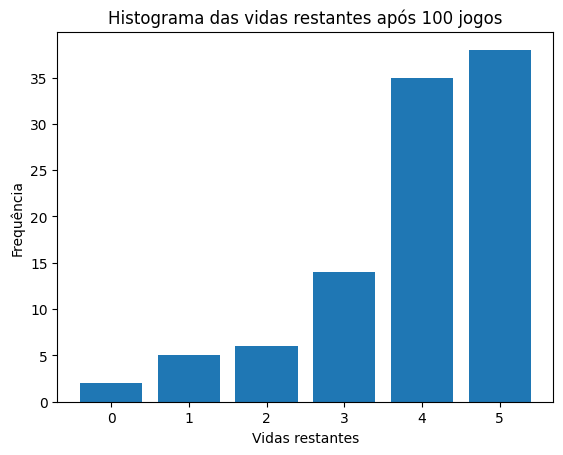

In [324]:
import matplotlib.pyplot as plt
resultados = []
n_jogos = 100

for _ in range(n_jogos):
    vidas_restantes = jogar(jogo)
    resultados.append(vidas_restantes)

print(f"Total de jogos: {n_jogos}")
print(f"Jogos ganhos: {sum([1 for vidas in resultados if vidas > 0])}")
print(f"Jogos perdidos: {sum([1 for vidas in resultados if vidas == 0])}")

plt.hist(resultados, bins=range(0, 7), align='left', rwidth=0.8)
plt.xlabel('Vidas restantes')
plt.ylabel('Frequência')
plt.title('Histograma das vidas restantes após 100 jogos')
plt.xticks(range(0, 6))
plt.show()
